# A simple 2-D example of PCA
(Adapted from http://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Make up some random 2-dimensional data

In [2]:
N = 100
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue
xData = xTrue + np.random.normal(0, 100, N)
yData = yTrue + np.random.normal(0, 100, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
data = np.hstack((xData, yData))

# We first move the data so that it has mean of zero in each dimension
mu = data.mean(axis=0)
data = data - mu

print("data has shape ",data.shape)
print(data[0:5,:]) # the first few rows of the data matrix

data has shape  (100, 2)
[[ -543.67553264 -1436.812863  ]
 [ -278.9834249  -1487.07806941]
 [ -443.33311809 -1297.8516258 ]
 [ -471.74888973 -1463.14763872]
 [ -402.67167897 -1338.14860078]]


## "SVD" is one technique from linear algebra for finding the principal components.

In [3]:
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
print("Here are the eigenvectors found using np.linalg.svd:")
print(eigenvectors)
print("The eigenvalues are:")
print(eigenvalues)

Here are the eigenvectors found using np.linalg.svd:
[[-0.31625294 -0.94867491]
 [-0.94867491  0.31625294]]
The eigenvalues are:
[ 9202.69276308   958.66168484]


## Now plot the data, and the principal components.

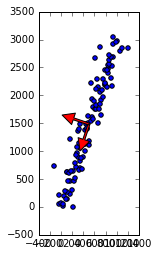

In [4]:
fig, ax = plt.subplots()
ax.scatter(xData, yData)
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()